# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Modules and Libraries</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.compose import make_column_selector
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
cl=cm.get_cmap('Accent')
colors=[cl(0),cl(0.2),cl(0.9),cl(0.4)]
from sklearn.feature_selection import f_regression

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D"> Importing DataSet</p>

In [2]:
data=pd.read_csv("/kaggle/input/phone-classification-dataset/train.csv")

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D"> Analysing DataSet </p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.duplicated().sum()

0

In [5]:
selector=make_column_selector(dtype_include='number')

In [6]:
numericals=selector(data)

In [7]:
type=data['price_range'].value_counts()

In [8]:
tw1=data.query('touch_screen==1 and wifi==1')['price_range'].value_counts()
tw2=data.query('touch_screen==0 and wifi==1')['price_range'].value_counts()
tw3=data.query('touch_screen==0 and wifi==0')['price_range'].value_counts()
tw4=data.query('touch_screen==1 and wifi==0')['price_range'].value_counts()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D"> Visualization Starts </p>

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Price Distribution</p>
</div>


(-1.1, 1.1, -1.1, 1.1)

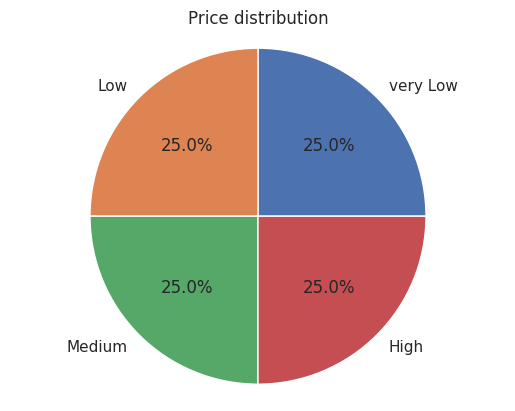

In [9]:
sb.set()
plt.pie(type,labels=['very Low','Low','Medium','High'],autopct='%1.1f%%')
plt.title('Price distribution')
plt.axis('equal')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">




- **ALL THE PRICE RANGE ARE IN UNIFORM DISTRIBUTION**

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Price Vs RAM</p>
</div>


Text(0.5, 1.0, 'Price Vs RAM')

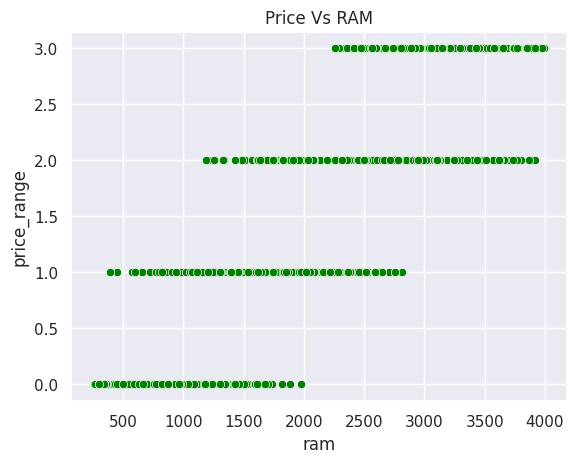

In [10]:
sb.scatterplot(data=data,x='ram',y='price_range',color='green')
plt.title('Price Vs RAM')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">



- **We can clearly see from the scatterplot that the price increases with RAM size**

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Battery Performance</p>
</div>


Text(0.5, 1.0, 'Battery Preference')

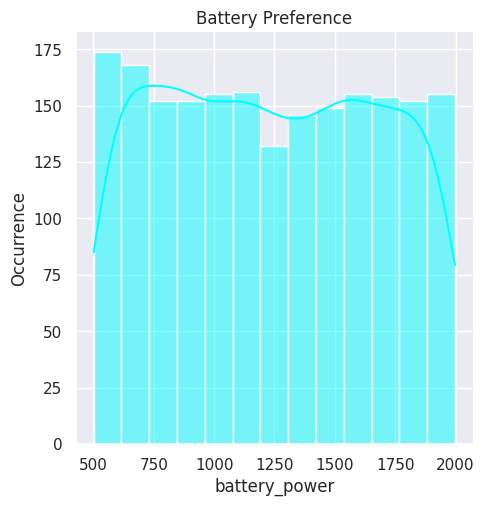

In [11]:
sb.displot(data.battery_power,kde=True,color='cyan')
plt.ylabel('Occurrence')
plt.title('Battery Preference')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">



- **Most mobiles have either good battery power or poor battery power.The mid ranged battery powered phones are not preferred**

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Correlation Map</p>
</div>


Text(0.5, 1.0, 'Battery, Price Range Correlation')

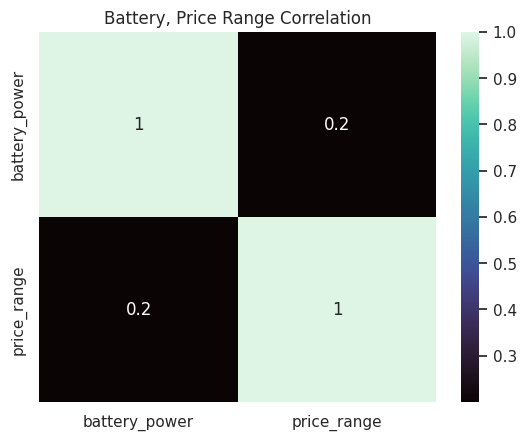

In [12]:
sb.heatmap(data[['battery_power','price_range']].corr(),annot=True,cmap='mako')
plt.title('Battery, Price Range Correlation')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">



- **The above table tells that battery power and price is not correlated well**

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Toch Screen With Wifi Frequency</p>
</div>


Text(0.5, 1.0, 'Touch Screen and Wifi Mobile Counts')

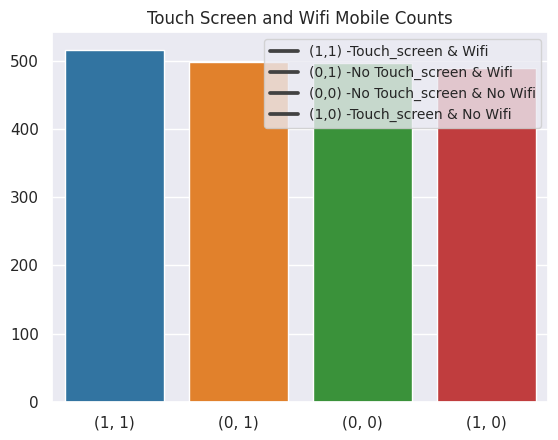

In [13]:
ans=data[['touch_screen','wifi']].value_counts()
sb.barplot(x=list(range(4)),y=ans.values,palette='tab10')
plt.xticks(range(4),ans.index)
legend_labels=['(1,1) -Touch_screen & Wifi','(0,1) -No Touch_screen & Wifi','(0,0) -No Touch_screen & No Wifi','(1,0) -Touch_screen & No Wifi']
plt.legend(legend_labels,fontsize='small',loc=1)
plt.title('Touch Screen and Wifi Mobile Counts')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Grabbing Insights From Multiple Features</p>

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Touch Screen , WiFi , Price Range</p>
</div>


<Figure size 2000x2000 with 0 Axes>

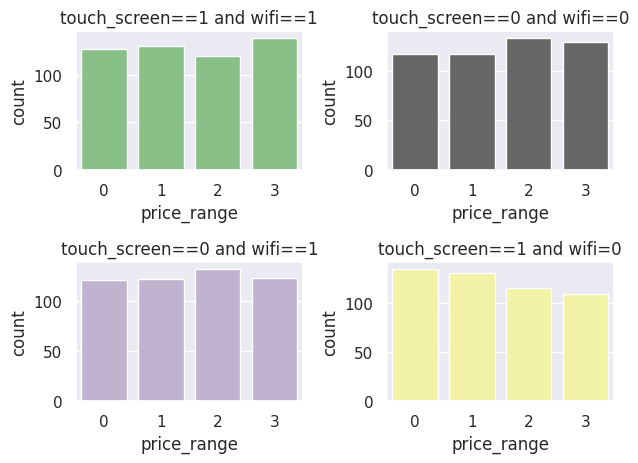

In [14]:
twlist=[tw1,tw2,tw3,tw4]
titles=['touch_screen==1 and wifi==1','touch_screen==0 and wifi==1','touch_screen==0 and wifi==0','touch_screen==1 and wifi=0']
fig=plt.figure(figsize=(20,20))
fig,axis=plt.subplots(2,2)

axis2=[axis[i,j] for j  in range(2) for i in range(2)]
for i in range(4):
    sb.barplot(y=twlist[i],x=twlist[i].index,ax=axis2[i],color=colors[i])
    axis2[i].set_title(titles[i])
fig.tight_layout()

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">


- **The above plot shows that touch screen without wifi (With high price) is not liked by user**
- **Likewise,The lower end mobiles without touch screen and wifi are also not liked by user**

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Price Range , Dual Sim Feature</p>
</div>


<Figure size 640x480 with 0 Axes>

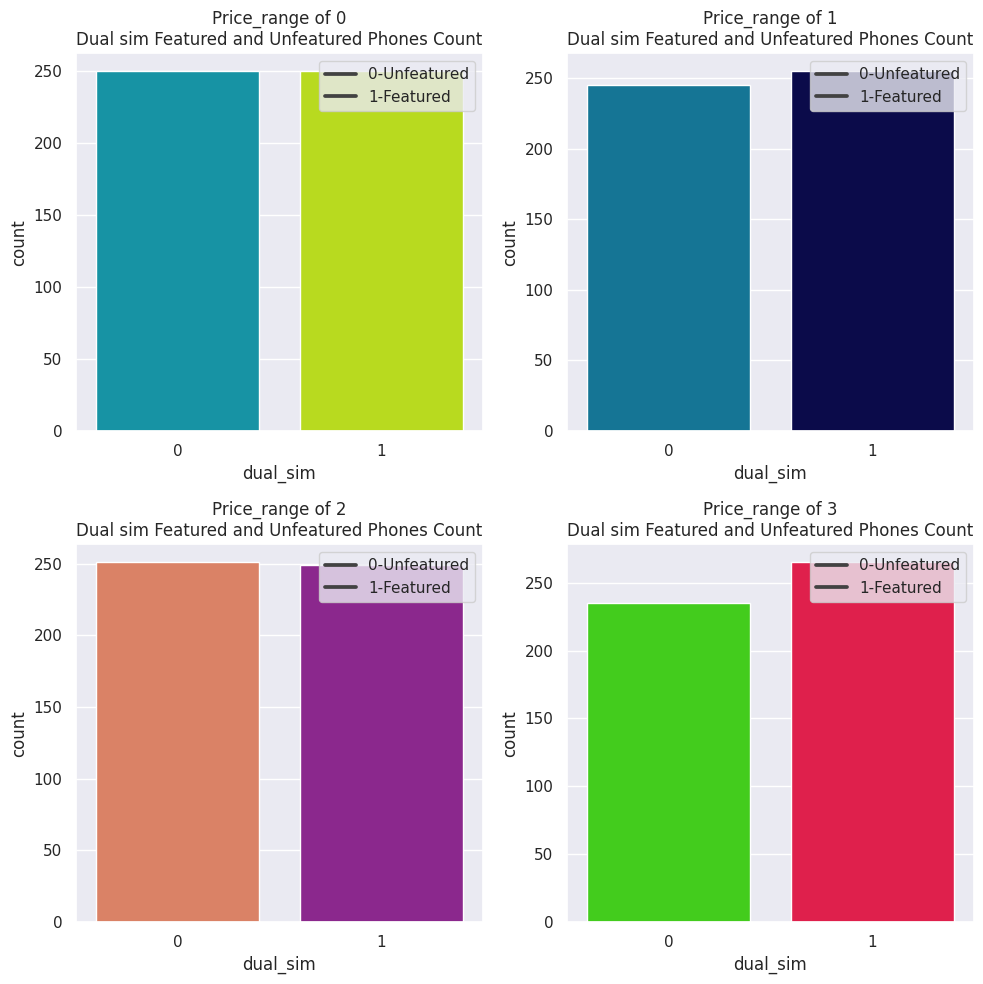

In [15]:
grp=data[['dual_sim','price_range']].groupby('price_range')
dual=[]
for i in range(4):
    dual.append((i,grp.get_group(i).value_counts().droplevel('price_range')))
klr=[ 'nipy_spectral', 'ocean_r',  'plasma_r', 'prism']
fig =plt.figure()
fig,axes=plt.subplots(2,2,figsize=(10,10))
axesplt=[axes[0][0],axes[0][1],axes[1][0],axes[1][1]]
for i in range(len(dual)):
    val=dual[i][1]
    axesplt[i].set_title('Price_range of %d\nDual sim Featured and Unfeatured Phones Count'%(i))
    sb.barplot(y=val,x=val.index,palette=klr[i],ax=axesplt[i])
    axesplt[i].legend(labels=['0-Unfeatured','1-Featured'],loc=1)
fig.tight_layout()

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

- **Mobiles in the price range of 3 have a comparatively lower count of non-dual sim features**

In [16]:
result=f_regression(data[data.columns[:-1]],data[['price_range']])

In [17]:
imp_colms=np.where(result[1]<0.05)[0]

In [18]:
newdf=data.iloc[:,imp_colms]

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Correlation Heatmap</p>
</div>


Text(0.5, 1.0, 'Correlation Heatmap')

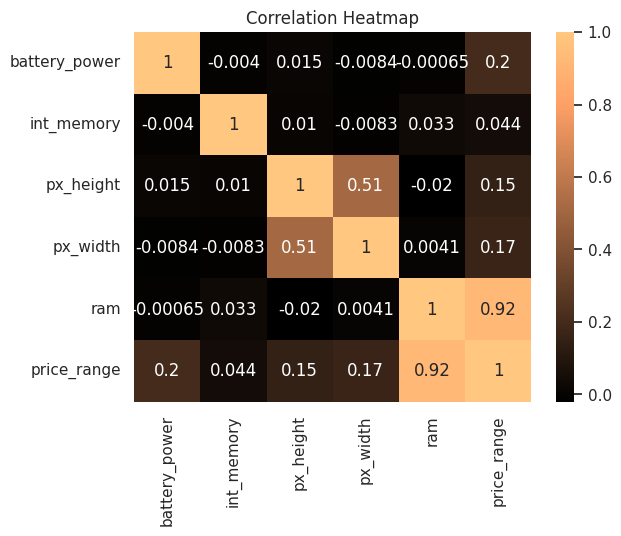

In [19]:
sb.heatmap(data=data[list(newdf.columns)+['price_range']].corr(),annot=True,cmap='copper')

plt.title('Correlation Heatmap')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">



- **The above Heatmap shows that**
- **1) There is a mild correlation between px_height and px_width**
- **2) There is a strong correlation between price_range and ram**

 <div style="border-radius: 10px; border: #3498db solid; padding: 15px; background-color: #ecf0f1; font-size: 300%; text-align: left; color: #2c3e50;">
   Thank You.Keep Kaggling
</div>
